# AS5001 (SUPA-AAA) Advanced (Astronomical) Data Analysis

## Project 2: Deadline 5 pm Wed 23 Nov 2022

## Hunting a Black Hole in GS2000

In the close binary system GS2000, a late-type main-sequence star
orbits around a compact object surrounded by an accretion disk.
GS2000 is a "soft X-ray transient" discovered during an outburst
of the disk when it became a bright X-ray source due to temporarily
increased rate of accretion onto the compact object.
The compact object is suspected to be a black hole,
but it could also be a neutron star.  Theory suggests that
the maximum mass possible for a neutron star is about 3 solar masses.

The goal of this project is to use data analysis techniques learned
in the lectures to estimate the mass of the compact object
in GS2000, and hence to determine if it is likely to be a black hole.
To measure the compact object mass, the strategy is to measure
the period and orbital velocity of the companion star,
and then apply Kepler's law.

The 10-m Keck telescope on Mauna Kea in Hawaii has been used to
obtain 13 spectra of GS2000 at 13 different binary phases.
The spectra include light both from the companion star and from
the accretion disk.  They were taken a few years after the outburst,
when accretion disk had faded considerably, so that the companion star
makes a substantial contribution to the spectrum.

Because GS2000 is quite faint, spectra are rather noisy
even with the CCD spectrograph on the 10m Keck telescope.
The H$\alpha$ emission line from the quiescent accretion disk is readily
visible, with a characteristic double-peaked velocity profile.
But it is not easy to spot absorption lines from the companion star
in the individual spectra.
For this reason a cross-correlation analysis is needed to detect
the radial velocity of the companion star at each of the 13 phases.
A number of bright main sequence stars were observed to provide
"template" spectra, in which the locations of absorption lines
are easily visible.

The techniques required have been developed in the lectures and homework sets.
Steps of the cross-correlation radial velocity analysis may be as follows:


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
from astropy.stats import sigma_clip

In [3]:
#Customise plot sizes and font size
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 15

1: Plot on a single page the template star spectra, arranged by spectral
type, and normalised to a common continuum level, to show how absorption line
ratios change with spectral type. [5]

In [48]:
spectral_types = ['g5', 'g9', 'k0', 'k1', 'k2', 'k4', 'k5', 'k7', 'k8', 'm0']

all_files = glob.glob('Data/Template star spectra/*.dat') #Import all the files
all_files.sort() 

#Create a dictionary of the files
data_spectral_types = {}
for f, file in enumerate(all_files):
    data_spectral_types[spectral_types[f]] = pd.read_csv(file, delim_whitespace=True, header=None)
    data_spectral_types[spectral_types[f]].columns = ['wavelength', 'flux', 'error'] #Naming the columns

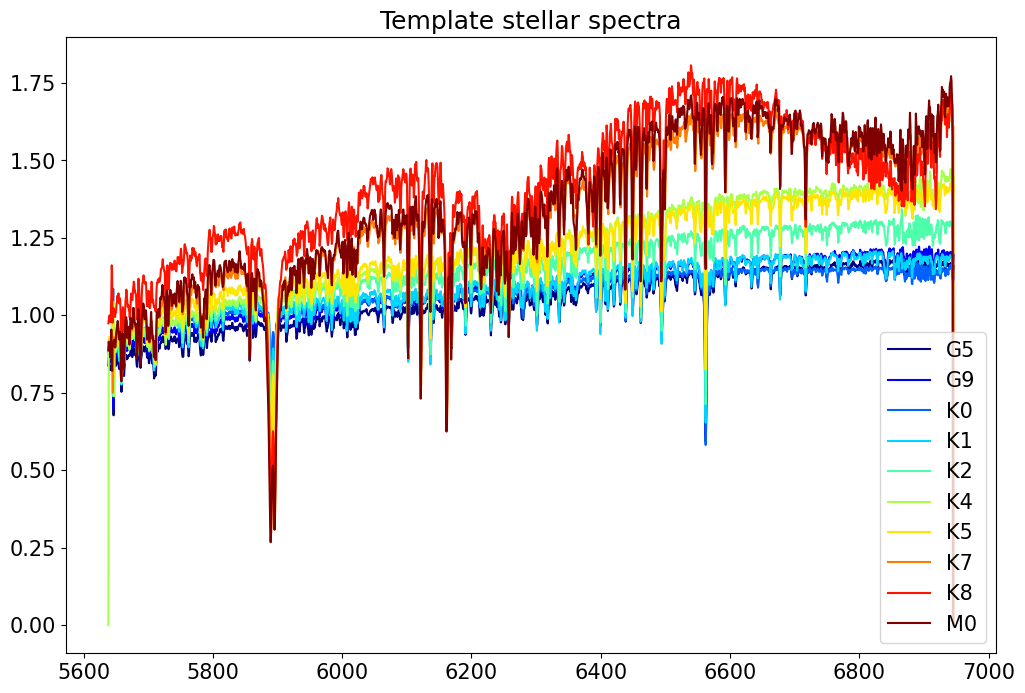

In [49]:
#Create a custom list of colours from the 'jet' colormap
from matplotlib import cm
colors = [cm.jet(x) for x in np.linspace(0, 1, len(spectral_types))]

plt.figure()

for i, star in enumerate(data_spectral_types):
    wl = data_spectral_types[star].wavelength #Retrieve the wavelength
    flux = data_spectral_types[star].flux #Retrieve the flux
    
    #Normalise to the continuum
    midflux = flux[len(flux)//2]
    normflux = flux/midflux
    
    plt.plot(wl, normflux, label=star.upper(), color=colors[i])

plt.legend(loc='lower right')
plt.title('Template stellar spectra')
plt.show()

2: Plot on a single page, ordered by binary phase, the 13 spectra of GS2000,
to show the shape of the continuum and the changing profile of the H-alpha
emission line. [5]

In [50]:
binary_phase = [-0.1405, -0.0583, 0.0325, 0.0998, 0.1740, 0.2310, 0.3079, 0.3699, 0.4388, 0.5008, 0.5698, 0.6371, 0.7276 ]
HJD = ['2449920.80713', '2449920.83542', '2449920.86667', '2449920.88982', '2449920.91539', '2449920.93501', '2449920.96145', '2449920.98281', '2449921.00649', '2449921.02784', '2449921.05158', '2449921.07473', '2449921.10589']

all_files = glob.glob('Data/GS2000 spectra/*.dat') #Import all the files
all_files.sort() #To sort the spectra according to binary phase

#Create a dictionary of the files
data_GS2000 = {}
for f, file in enumerate(all_files):
    data_GS2000[binary_phase[f]] = pd.read_csv(file, delim_whitespace=True, header=None)
    data_GS2000[binary_phase[f]].columns = ['wavelength', 'flux', 'error'] #Naming the columns

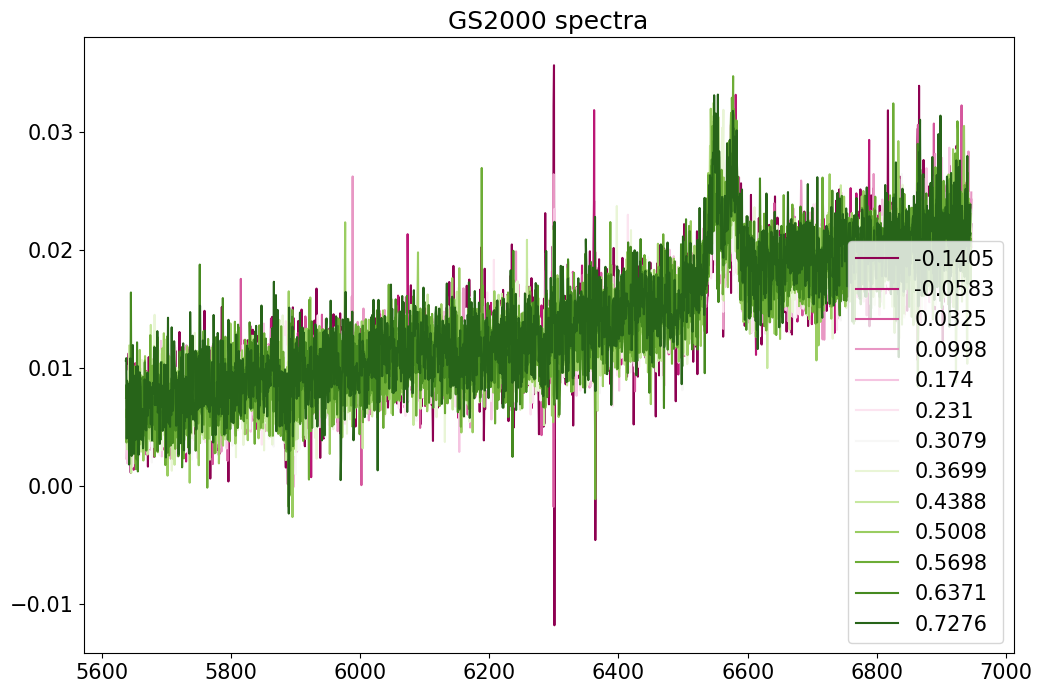

In [51]:
#Create a custom list of colours from the 'PiYG' colormap
from matplotlib import cm
colors = [cm.PiYG(x) for x in np.linspace(0, 1, len(binary_phase))]

plt.figure()

for i, spectrum in enumerate(data_GS2000):
    wl = data_GS2000[spectrum].wavelength #Retrieve the wavelength
    flux = data_GS2000[spectrum].flux #Retrieve the flux
    
    plt.plot(wl, flux, label=spectrum, color=colors[i])

plt.legend(loc='lower right')
plt.title('GS2000 spectra')
plt.show()

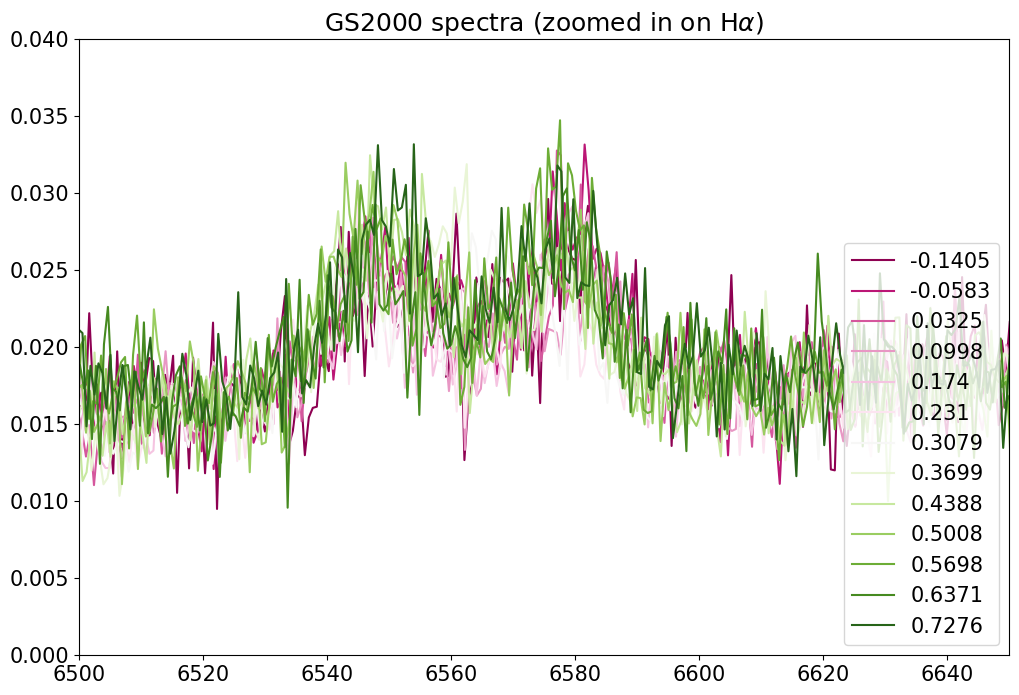

In [52]:
#Zooming in on the Halpha feature:

plt.figure()

for i, spectrum in enumerate(data_GS2000):
    wl = data_GS2000[spectrum].wavelength #Retrieve the wavelength
    flux = data_GS2000[spectrum].flux #Retrieve the flux
    
    plt.plot(wl, flux, label=spectrum, color=colors[i])

plt.legend(loc='lower right')
plt.xlim(6500, 6650)
plt.ylim(.0, .04)
plt.title(r'GS2000 spectra (zoomed in on H$\alpha$)')
plt.show()

3: Plot the average of the 13 spectra of GS2000.
Are any of the expected absorption lines detected?
What range of spectral types provides a good match? [5]

In [64]:
fluxes = np.zeros(2041) #The amount of wavelength points is 2041
for spectrum in data_GS2000:
    fluxes += data_GS2000[spectrum].flux
fluxes = fluxes/13

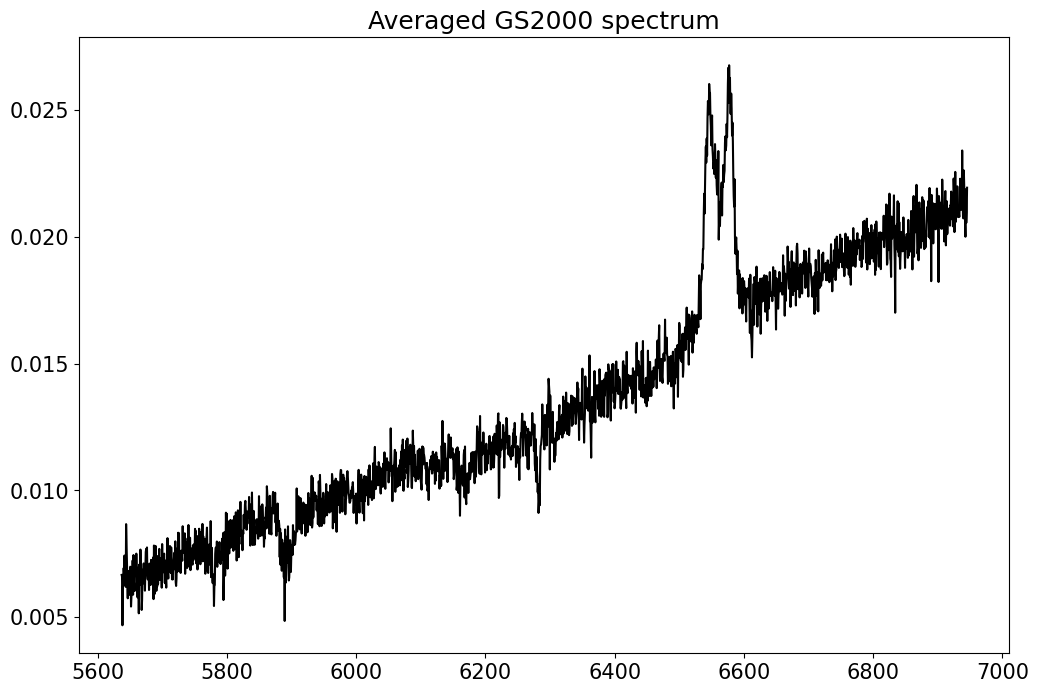

In [65]:
plt.figure()

wl = data_GS2000[spectrum].wavelength #Retrieve the wavelength

plt.plot(wl, fluxes, color='k') 

plt.title('Averaged GS2000 spectrum')
plt.show()

This spectrum roughly corresponds to the spectral types G5-K5, purely by visual inspection. We see a strong absorption feature at roughly 5900 Å, which could correspond to Na D1 and D2 lines in K0-K5 stars. So this is more likely a K dwarf than a G dwarf.

4: Fit a smooth function to the continuum of each of the spectra.
Plot the average GS2000 spectrum divided by the fitted continuum,
and do the same for the most suitable template spectrum. [10]

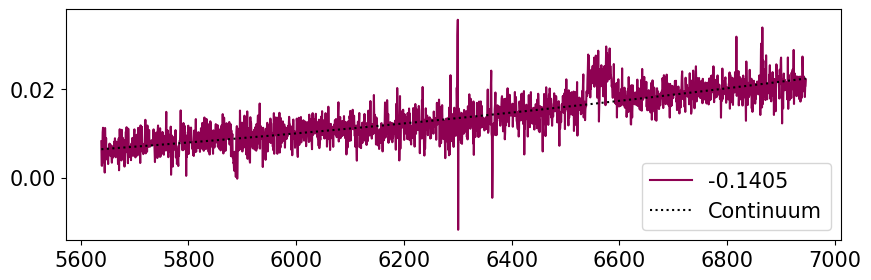

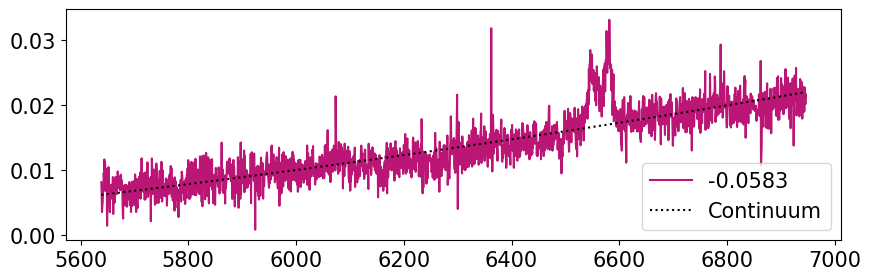

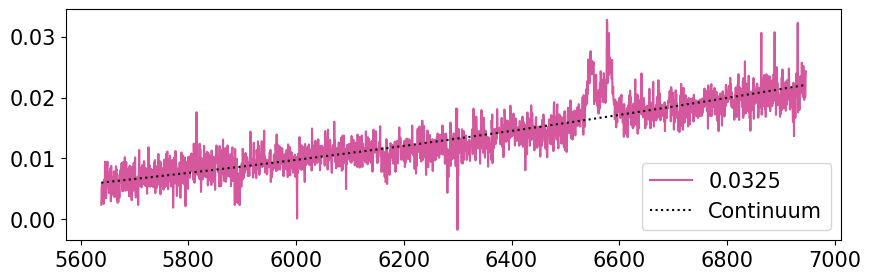

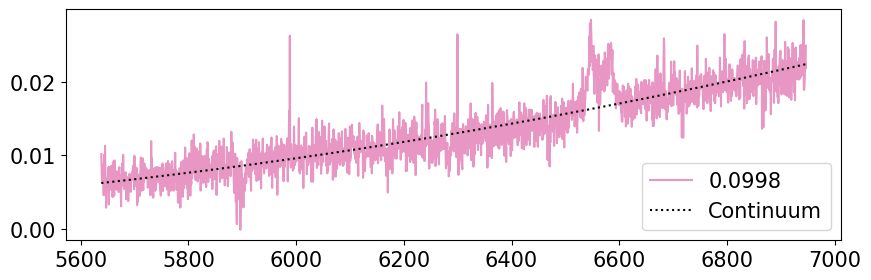

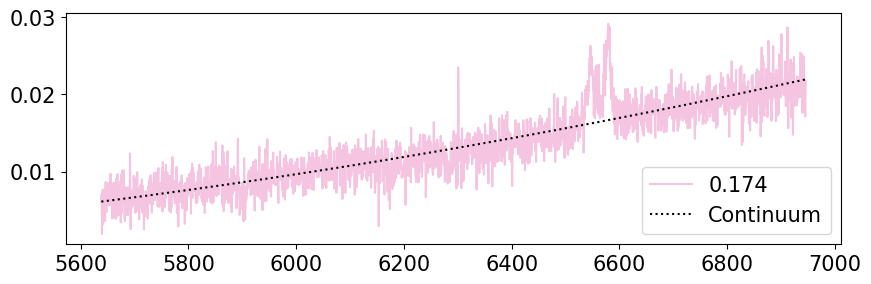

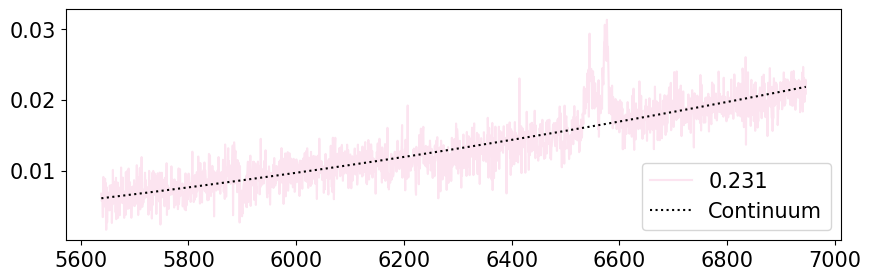

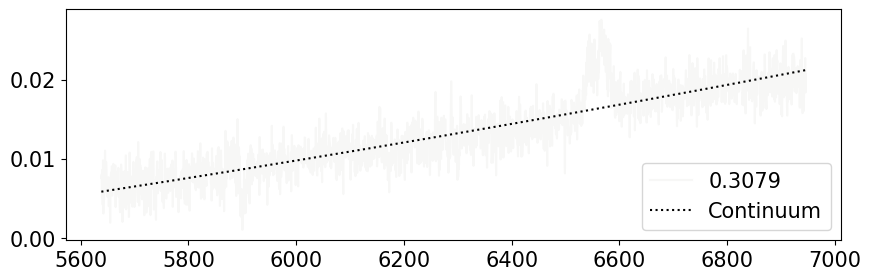

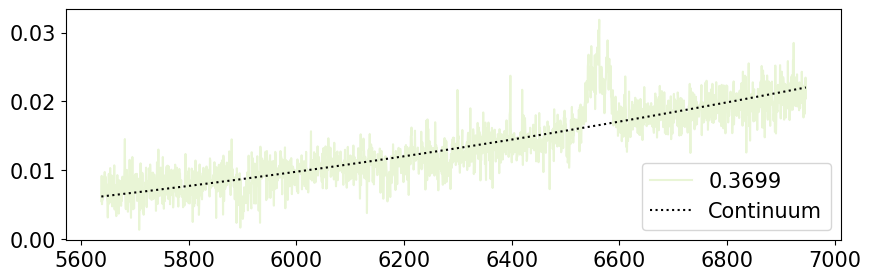

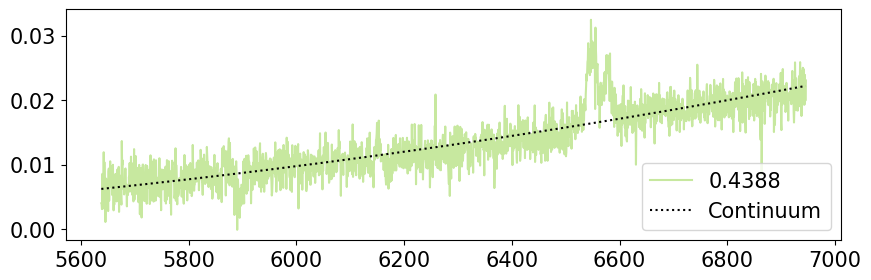

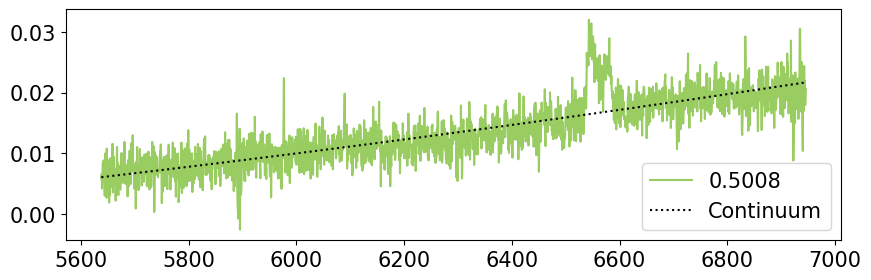

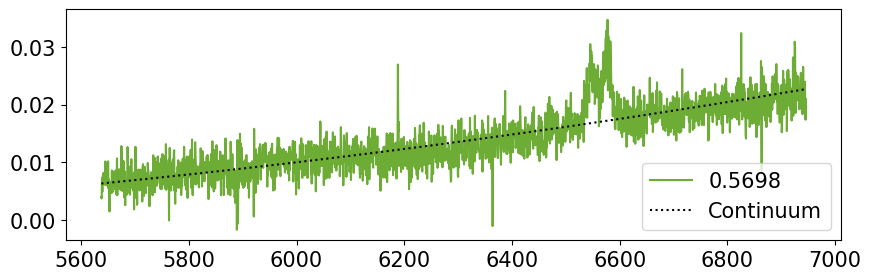

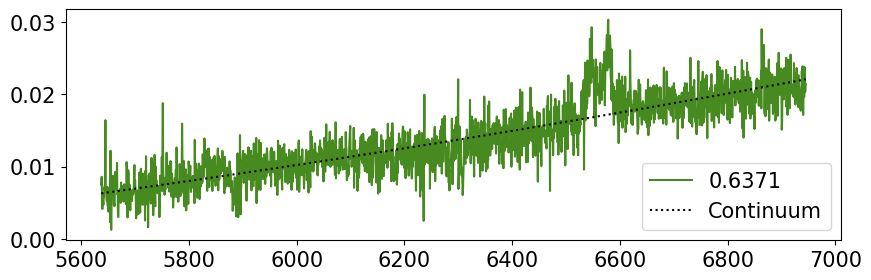

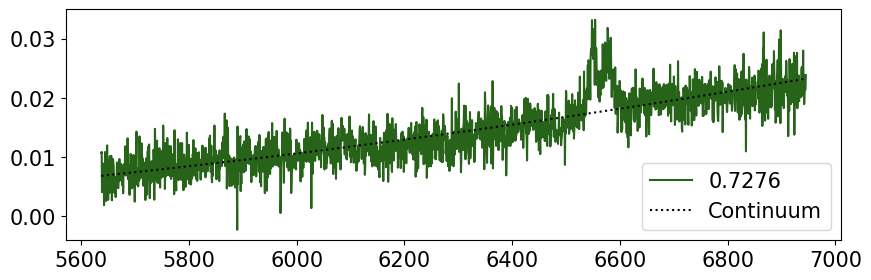

In [90]:
#Fit a smooth function to the continuum of each of the spectra

#Create a custom list of colours from the 'jet' colormap
from matplotlib import cm
colors = [cm.PiYG(x) for x in np.linspace(0, 1, len(binary_phase))]

for i, spectrum in enumerate(data_GS2000):
    plt.figure(figsize=[10,3])
    
    wl = data_GS2000[spectrum].wavelength #Retrieve the wavelength
    flux = data_GS2000[spectrum].flux #Retrieve the flux
    
    #Normalise to the continuum
    clipflux = sigma_clip(flux, sigma=2) #2-sigma clipping
    continuum = np.polyfit(wl, clipflux, 2)[0]*(wl**2) + np.polyfit(wl, clipflux, 2)[1]*wl + np.polyfit(wl, clipflux, 2)[2]
    normflux = flux/continuum
    
    plt.plot(wl, flux, label=spectrum, color=colors[i])
    #plt.plot(wl, clipflux, label=spectrum, color='red', ls='dashed')
    plt.plot(wl, continuum, label='Continuum', color='k', ls='dotted')

    plt.legend(loc='lower right')
    plt.show()

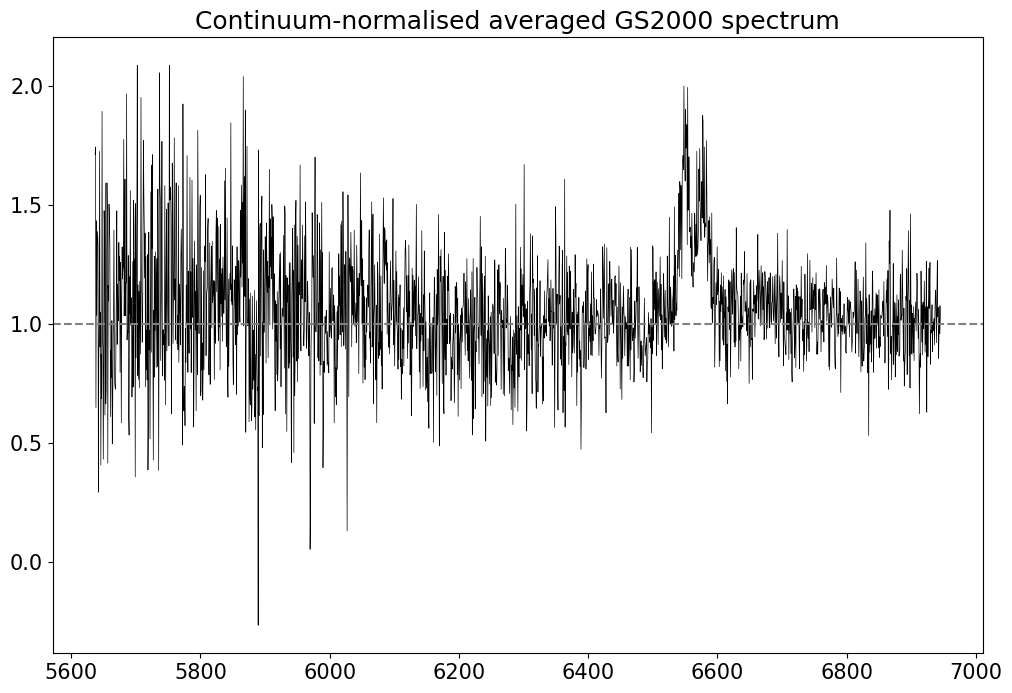

In [93]:
#Average the fluxes
fluxes = np.zeros(2041) #The amount of wavelength points is 2041
for spectrum in data_GS2000:
    fluxes += data_GS2000[spectrum].flux
fluxes = fluxes/13

wl = data_GS2000[spectrum].wavelength #Retrieve the wavelength

#Normalise to the continuum
clipflux = sigma_clip(fluxes, sigma=2) #2-sigma clipping
continuum = np.polyfit(wl, clipflux, 2)[0]*(wl**2) + np.polyfit(wl, clipflux, 2)[1]*wl + np.polyfit(wl, clipflux, 2)[2]
normflux = flux/continuum

#Plot
plt.figure()
#plt.plot(wl, fluxes, label=spectrum, color='k')
#plt.plot(wl, clipflux, label=spectrum, color='green', ls='dashed')
#plt.plot(wl, continuum, label='Continuum', color='magenta')
plt.plot(wl, normflux, label='Continuum', color='k', linewidth=.5)

plt.axhline(1.0, ls='dashed', color='gray')

plt.title('Continuum-normalised averaged GS2000 spectrum')
plt.show()

Which is the most suitable template spectrum? Let's plot all K0-K5 template spectra on top of the spectrum above, to see which is the best fit, by visual inspection.

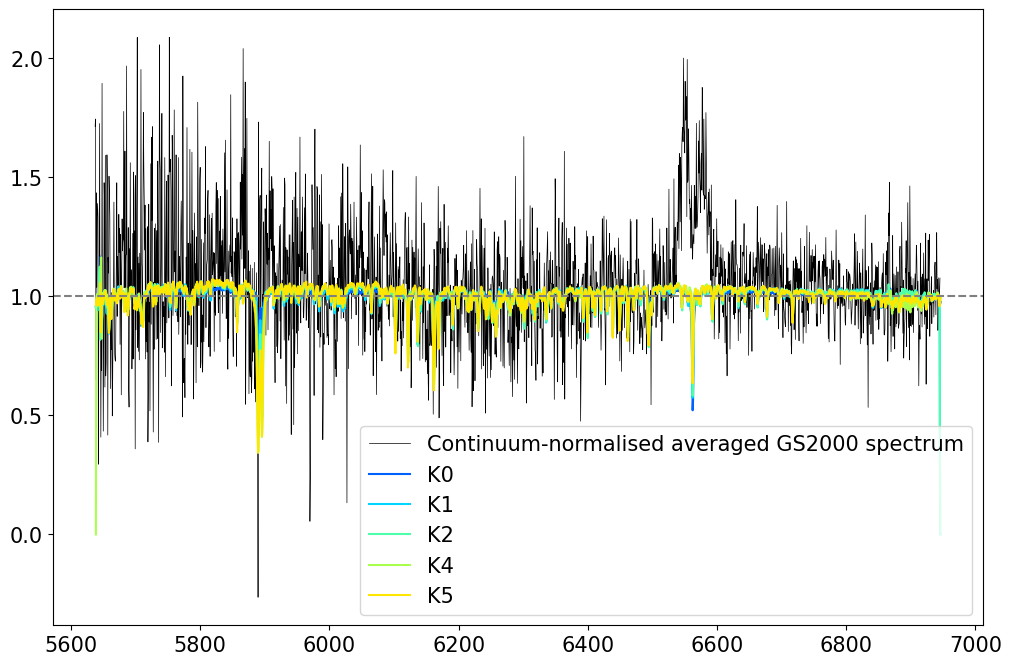

In [94]:
plt.figure()

#Repeat the plot above
plt.plot(wl, normflux, color='k', label='Continuum-normalised averaged GS2000 spectrum', linewidth=.5)

#Fit a smooth function to the continuum of the K0-K5 dwarfs
kdwarfs = ['k0', 'k1', 'k2', 'k4', 'k5']
colors = [cm.jet(x) for x in np.linspace(0, 1, len(spectral_types))]
colors = [cm.jet(x) for x in np.linspace(0, 1, len(spectral_types))]
colors.pop(0)
colors.pop(0)
colors.pop(-1)
colors.pop(-1)
colors.pop(-1)
for i, spectrum in enumerate(kdwarfs):
    wl = data_spectral_types[spectrum].wavelength #Retrieve the wavelength
    flux = data_spectral_types[spectrum].flux #Retrieve the flux
    
    #Normalise to the continuum
    clipflux = sigma_clip(flux, sigma=2) #2-sigma clipping
    continuum = np.polyfit(wl, clipflux, 2)[0]*(wl**2) + np.polyfit(wl, clipflux, 2)[1]*wl + np.polyfit(wl, clipflux, 2)[2]
    normflux = flux/continuum
    
    plt.plot(wl, normflux, color=colors[i], label=spectrum.upper())

plt.axhline(1.0, ls='dashed', color='gray')
plt.legend()
plt.show()

By visual inspection, it seems like the K5 spectrum fits the GS2000 spectrum the best, due to its continuum aligning well with that of the observed spectrum. The plots above are continuum-normalised, so in reality it's not these plots that one should be comparing to make these conclusions, but to find the continuum I have just used a polynomial fit instead of e.g. a spline fit (which I found overfitted the spectrum by fitting to the noise, and so a smoothing would have to be performed on it). The polynomial fit is very smooth though, and doesn't take the medium-scale (50-100 Å) fluctutions of the continuum into account. So any continuum variations of this scale are preserved in the above plots, and for that reason, the above plot can be used for this conclusion.

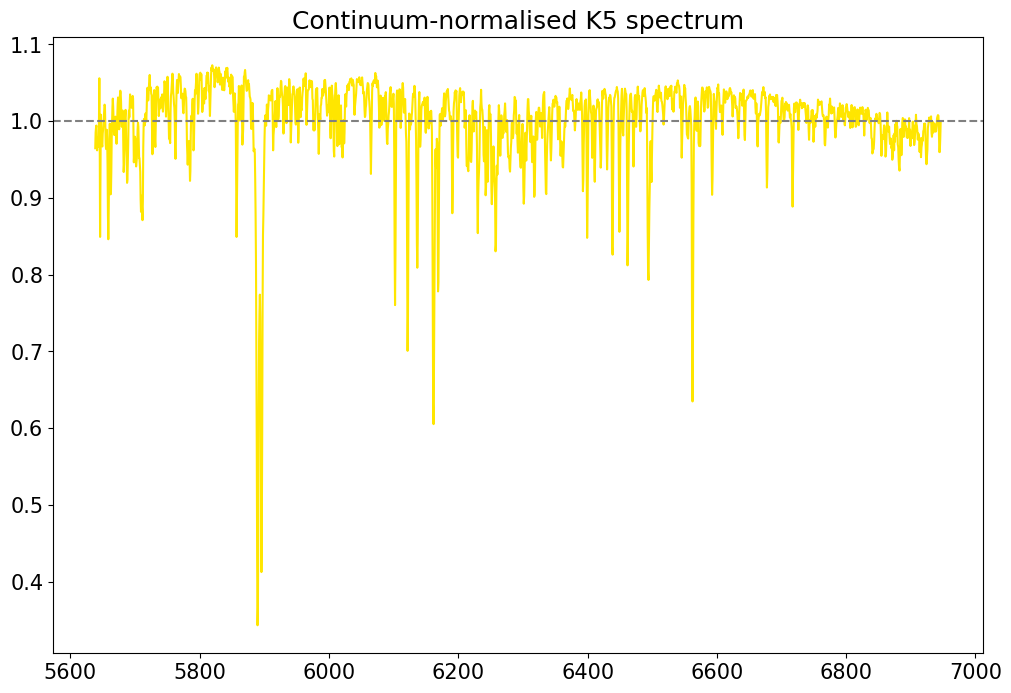

In [96]:
#Fit a smooth function to the continuum of the most suitable template spectrum, K5

plt.figure()
    
wl = data_spectral_types['k5'].wavelength #Retrieve the wavelength
flux = data_spectral_types['k5'].flux #Retrieve the flux
    
#Normalise to the continuum
clipflux = sigma_clip(flux, sigma=2) #2-sigma clipping
continuum = np.polyfit(wl, clipflux, 2)[0]*(wl**2) + np.polyfit(wl, clipflux, 2)[1]*wl + np.polyfit(wl, clipflux, 2)[2]
normflux = flux/continuum
    
plt.plot(wl, normflux, color=colors[-1])

plt.axhline(1.0, ls='dashed', color='gray')

plt.title('Continuum-normalised K5 spectrum')
plt.show()

5: For each of the 13 spectra, measure the radial velocity by
performing a cross-correlation analysis with the most suitable
template spectrum. [25]

To accomplish this:
    
(a) Subtract the continuum from the GS2000 spectrum,
and from the template spectra.
    

In [14]:
crosscorr_GS2000 = {} #Create a new dictionary for the modified spectra
for i, spectrum in enumerate(data_GS2000):
    crosscorr_GS2000[spectrum] = data_GS2000[spectrum]
    
    wl = crosscorr_GS2000[spectrum].wavelength #Retrieve the wavelength
    flux = crosscorr_GS2000[spectrum].flux #Retrieve the flux
    
    #Normalise to the continuum
    clipflux = sigma_clip(flux, sigma=2) #2-sigma clipping
    continuum = np.polyfit(wl, clipflux, 2)[0]*(wl**2) + np.polyfit(wl, clipflux, 2)[1]*wl + np.polyfit(wl, clipflux, 2)[2]
    
    crosscorr_GS2000[spectrum].flux -= continuum

crosscorr_template_spectra = {} #Create a new dictionary for the modified spectra
for i, spectrum in enumerate(data_spectral_types):
    crosscorr_template_spectra[spectrum] = data_spectral_types[spectrum]
    
    wl = crosscorr_template_spectra[spectrum].wavelength #Retrieve the wavelength
    flux = crosscorr_template_spectra[spectrum].flux #Retrieve the flux
    
    #Normalise to the continuum
    clipflux = sigma_clip(flux, sigma=2) #2-sigma clipping
    continuum = np.polyfit(wl, clipflux, 2)[0]*(wl**2) + np.polyfit(wl, clipflux, 2)[1]*wl + np.polyfit(wl, clipflux, 2)[2]
    
    crosscorr_template_spectra[spectrum].flux -= continuum

(b) Apply a velocity shift to the continuum-subtracted
template spectrum.

The Doppler shift equation is as follows: $\frac{\Delta \lambda}{\lambda_0} = \frac{v}{c}$
...which leads to: $\Delta \lambda = \frac{\lambda_0 v}{c}$. This latter fraction is then what needs to be added to the wavelengths of the template spectrum K5.

In [15]:
def vel_shift(v):
    c = 3*1e5
    wl_velshifted = crosscorr_template_spectra['k5'].wavelength*(1 + (v/c))
    return wl_velshifted

(c) Scale the shifted and continuum-subtracted template
spectrum to fit the continuum-subtracted GS2000 spectrum.

(d) Repeat the above for a number of different velocities,
and plot the $\chi^2$ of the fit as a function of 
the velocity shift.

We must begin by finding the correct velocity that suits the spectra, and while doing so, we find the correct scaling by using optimal scaling, where the pattern is the template K5 spectrum.

In [16]:
def chisquared(data, model, error):
    chisquared = sum(((data - model)/error)**2)
    return chisquared

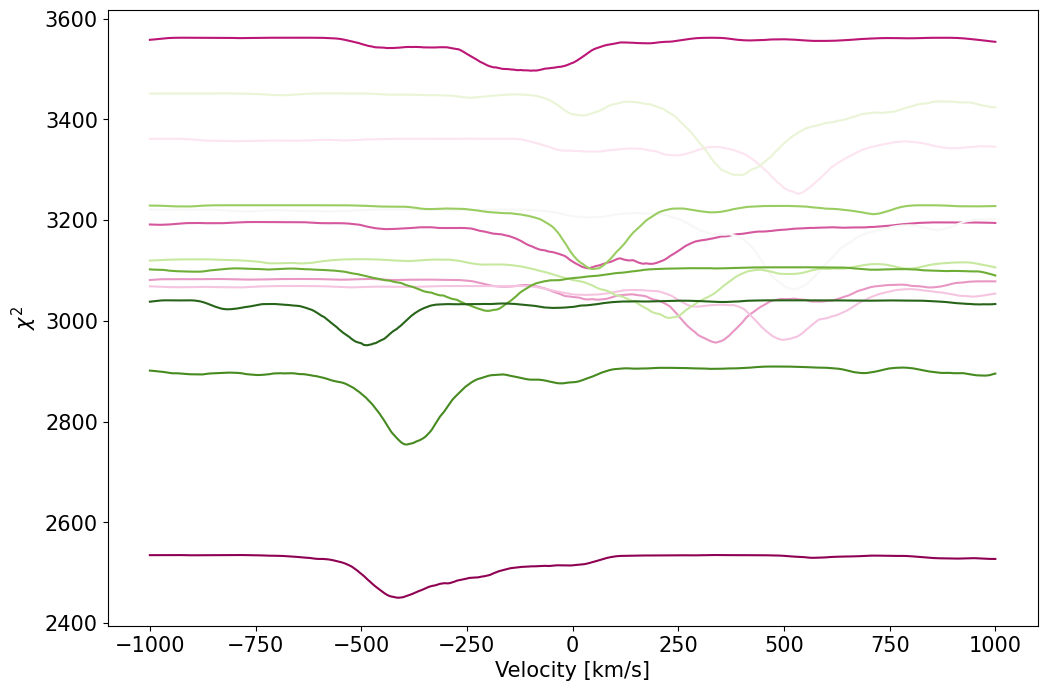

In [17]:
vels = np.linspace(-1e3, 1e3, num=1000) #Try 1000 velocities between 0 and 1000 km/s

k5_flux = crosscorr_template_spectra['k5'].flux

chisquares = []

for i, spectrum in enumerate(crosscorr_GS2000):
    wl = crosscorr_GS2000[spectrum].wavelength
    flux = crosscorr_GS2000[spectrum].flux
    errs = crosscorr_GS2000[spectrum].error
    
    chisquares_spec = []
    for v in vels:
        #Shift of the template star's wavelength
        k5_velshifted = vel_shift(v)
        
        #We need to make the shifted wavelength and the scaled flux match each other
        P = np.interp(wl, k5_velshifted, k5_flux)
        
        #Optimal scaling of the template star's flux
        A = sum((P*flux)/errs**2)/sum((P/errs)**2)
        
        #The final model is the pattern times this value
        mu = A*P
        
        chisquares_spec.append(chisquared(flux, mu, errs))
    
    chisquares.append(chisquares_spec)

plt.figure()
colors = [cm.PiYG(x) for x in np.linspace(0, 1, len(binary_phase))]

#Determine where minimum chi squared occurs and plot all the velocities 
chisqmin = [] #Saves the element of all the minimum chi squares
deltachisq1 = [] #Saves the element of where deltachisquared = 1
for i, chi in enumerate(chisquares):
    plt.plot(vels, chi, color=colors[i])
    
    #Find the minimum chi squared
    minchi = np.min(chi)
    index = chi.index(minchi)
    chisqmin.append(index)
    
    #Locate where deltachisquared = 1
    deltachi = chi 
    deltachi.pop(index) #Remove the minimum
    index = min(range(len(deltachi)), key=lambda i: abs(deltachi[i]-(minchi+1)))
    deltachisq1.append(index)
    
plt.xlabel('Velocity [km/s]')
plt.ylabel('$\chi^2$')
plt.show()

(e) Use the $\chi^2$ minimum to estimate the radial velocity
and its 1-sigma uncertainty.

6: Plot the measured velocities and 1-sigma uncertainties
as a function of binary phase. Put these results also 
in a table in your report. [5]

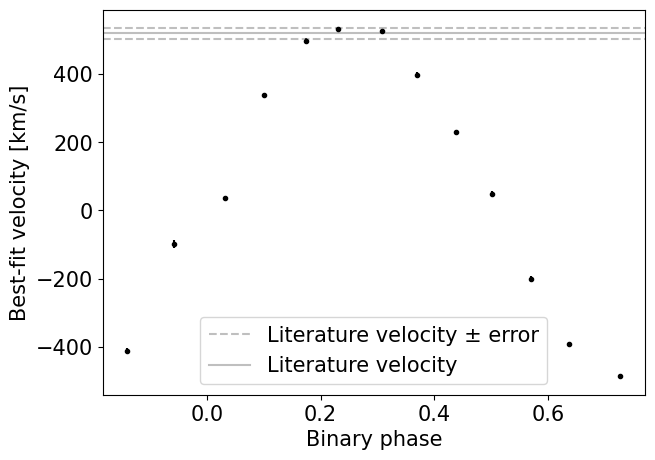

In [18]:
plt.figure(figsize=[7,5])

#The velocities
best_vels = vels[chisqmin]
#The velocities at deltachisquared = 1
next_best_vels = vels[deltachisq1]
#The velocity errors
vel_errs = np.abs(best_vels - next_best_vels)

plt.errorbar(binary_phase, best_vels, yerr=vel_errs, color='k', fmt='.')

plt.axhline(520+16, color='gray', ls='dashed', alpha=.5, label='Literature velocity ± error')
plt.axhline(520, color='gray', alpha=.5, label='Literature velocity')
plt.axhline(520-16, color='gray', ls='dashed', alpha=.5)

plt.xlabel('Binary phase')
plt.ylabel('Best-fit velocity [km/s]')
plt.legend()
plt.show()

7: Fit a sinusoidal velocity curve of the form
$$
V(\phi) = \gamma + K_x  \sin{( 2\,\pi\,\phi)} + K_y 
\cos{(2\,\pi\,\phi)}
$$
to the 13 velocity measurements. Show the best fit velocity curve
on your plot with the data points and error bars. [5]

In [21]:
from scipy.optimize import curve_fit
import math

def sinusoidal(phase, gamma, Kx, Ky):
    return gamma + Kx*np.sin(2*math.pi*phase) + Ky*np.cos(2*math.pi*phase)

fit = curve_fit(sinusoidal, binary_phase, best_vels)
gamma = fit[0][0]
Kx = fit[0][1]
Ky = fit[0][2]
pcov = np.sqrt(np.diag(fit[1]))
Kxerr = pcov[1]
Kyerr = pcov[2]

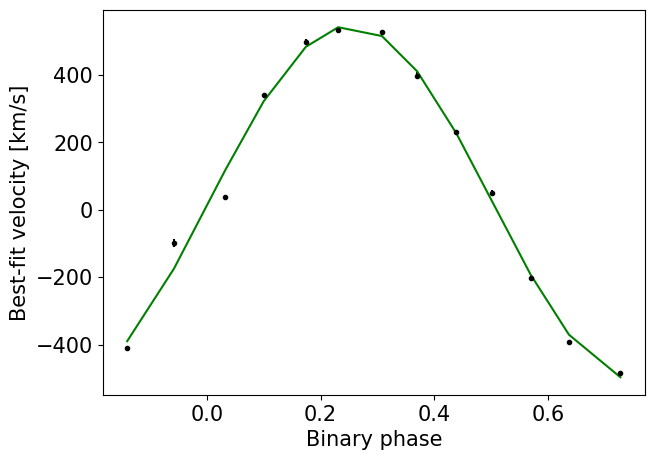

In [22]:
plt.figure(figsize=[7,5])

binary_phase = np.array(binary_phase)

plt.errorbar(binary_phase, best_vels, yerr=vel_errs, color='k', fmt='.')
plt.plot(binary_phase, sinusoidal(binary_phase, gamma, Kx, Ky), color='green')

plt.xlabel('Binary phase')
plt.ylabel('Best-fit velocity [km/s]')
plt.show()

8: From your results, estimate the radial velocity semi-amplitude,
$$	K = \left( {K_x}^2 + {K_y}^2 \right)^{1/2}
$$
	and its 1-$\sigma$ uncertainty.
	This is the orbit velocity of the companion star,
	projected by a factor $\sin{\left(i\right)}$ due to the inclination of 
the orbit. Describe your algorithm clearly and without unambiguity. [10]

The uncertainty in $K$, $K_\text{err}$, is calculated by the following error propagation expression, which assumes the errors in $K_x$ and $K_y$ are independent and random:

$K_\text{err} = \sqrt{(\frac{\partial K}{\partial K_x} \cdot K_\text{x, err})^2 + (\frac{\partial K}{\partial K_y} \cdot K_\text{y, err})^2} = \sqrt{(K_x (K_x^2 + K_y^2)^{-1/2} K_\text{x, err})^2 + (K_y (K_x^2 + K_y^2)^{-1/2} K_\text{y, err})^2} = \sqrt{(K_x^2 + K_y^2)^{-1}(K_x^2K_\text{x, err}^2 + K_y^2K_\text{y, err}^2)}$

In [100]:
K = np.sqrt(Kx**2 + Ky**2)

Kerr = np.sqrt((Kx**2 + Ky**2)**(-1)*(Kx**2*Kxerr**2 + Ky**2*Kyerr**2)) 

print('The orbit velocity of the companion star is', round(K), '±', round(Kerr), 'km/s. The literature value is 520 ± 16 km/s.')

The orbit velocity of the companion star is 525 ± 16 km/s. The literature value is 520 ± 16 km/s.


9: Give two expressions for the compact object mass function $f(M_x)$,
the first in terms of the observable quantities $P$ and $K$,
and the second in terms of the compact object mass $M_x$,
the inclination $i$, and the mass ratio $q=M_c/M_x$, where $M_c$ is
the companion star mass.
From the binary period $P$ and your measured $K$ velocity,
estimate $f(M_x)$ in solar units.
Give also the 1-sigma uncertainty. [5]

The compact object mass function was used already in homework 2, and we defined it as:

$f(M_x) = \frac{M_x(\sin{i})^3}{(1+q)^2} = \frac{K^3 P}{2 \pi G}$

We already have a value for $K$, and in this formula, $P$ is measured in days. For $P = $ 0.344086 ± 0.000002 days (from the data notes and the literature), we get the following estimate of $f(M_x)$.

The uncetainty in $f(M_x)$ is once again computed using error propagation, again assuming independent and random uncertainties in $P$ and $K$, yielding the following expression:

$f(M_x)_\text{err} = \sqrt{(\frac{\partial f(M_x)}{\partial K} \cdot K_\text{err})^2 + (\frac{\partial f(M_x)}{\partial P} \cdot P_\text{err})^2} = \sqrt{(\frac{3K^2 P}{2 \pi G} \cdot K_\text{err})^2 + (\frac{K^3}{2 \pi G} \cdot P_\text{err})^2}$

In [101]:
P = 0.34*24*60*60 #Convert to s
Perr = 0.000002*24*60*60
G = 6.67e-11
K = np.sqrt(Kx**2 + Ky**2)*1e3 #Convert to m
Kerr = np.sqrt((Kx**2 + Ky**2)**(-1)*(Kx**2*Kxerr**2 + Ky**2*Kyerr**2))*1e3

Msun = 2e30
f = (K**3*P)/(2*math.pi*G)/Msun
ferr = np.sqrt(((3*K**2*P)/(2*math.pi*G))**2*Kerr**2 + ((K**3)/(2*math.pi*G))**2*Perr**2)/Msun

print('The compact object mass function in solar units is:', round(f, 4), '±', round(ferr, 4))

The compact object mass function in solar units is: 5.0603 ± 0.4565


10: Adopt a specific inclination $i=90^\circ$,
and a specific $M_c=0.5~M_\odot$.
For these choices, calculate the compact
object mass $M_x$. Give the 1-$\sigma$ uncertainty, assuming that 
$i$ and $M_c$ are known exactly.
Be clear about your algorithm for estimating the uncertainties,
and collect your results in a table in your report. [5]

We can recast the equation above to get $M_x$:

$M_x = \frac{f(M_x)(1+q)^2}{(\sin{i})^3} = \frac{f(M_x)(1+ M_c/M_x)^2}{(\sin{i})^3} = \frac{f(M_x)(1 + 2M_c/M_x + M_c^2/M_x^2)}{(\sin{i})^3} = \frac{f(M_x)}{(\sin{i})^3} + \frac{2f(M_x)M_c}{(\sin{i})^3M_x} + \frac{f(M_x)M_c^2}{(\sin{i})^3M_x^2} = f(M_x) + \frac{f(M_x)}{M_x} + \frac{0.25 f(M_x)}{M_x^2}$

Multiply by $M_x^2$ to get rid of the term in the denominator:

$M_x^3 = f(M_x)M_x^2 + f(M_x)M_x + 0.25 f(M_x)$

Gather the terms:

$M_x^3 - f(M_x)M_x^2 - f(M_x)M_x - 0.25 f(M_x) = 0$

In [103]:
#Coefficient vector for the expression above
p = [1, -f, -f, -0.25*f]
Mxs = np.roots(p)
print(Mxs)

[ 5.94694998+0.j         -0.44333669+0.12719388j -0.44333669-0.12719388j]


We can ignore the negative and imaginary roots, as they are unphysical masses, and so the compact object mass $M_x$ is:

In [104]:
Mx = Mxs[0].real
print(round(Mx, 2))

5.95


For the 1$-\sigma$ uncertainty on $M_x$, we know that the error only depends on the error on $f(M_x)$ because we know $M_c$ and $i$ exactly. The previous error propagation formula then becomes very simple: 

$M_\text{x, err} = |\frac{df(M_x)}{dM_x}| f_\text{err}$

...but to use it we first have to rewrite the expression containing $M_x$ and $f(M_x)$ into an equation:

$f(M_x) = \frac{M_x^3}{-(M_x^2 + M_x + 0.25)}$

...and so we get the derivative:

$\frac{df(M_x)}{dM_x} = \frac{-M_x^2(M_x^2 + 2M_x + 0.75)}{(M_x^2 + M_x + 0.75)^2}$

In [108]:
Mxerr = np.abs(-Mx**2*(Mx**2 + 2*Mx + 0.75)/((Mx**2 + Mx + 0.75)**2))*ferr
print(round(Mx, 2), '±', round(Mxerr, 2))

5.95 ± 0.44


11: In fact $i$ and $M_c$ are not known, but have some limited range.
What range of $i$ and $M_c$ would be appropriate, given what
you know about the spectral type of the donor star, and
considering that no eclipses occur?
Use Monte-Carlo error propogation to sample the range of uncertainty
in $i$, $M_c$, $K$, and $P$.  Be careful to assume a distribution 
for $i$ that corresponds to a random orbit orientation.
For each Monte-Carlo trial, calculate
the corresponding $M_x$.  Make plots showing the resulting
probability distribution for $M_x$, both as a probability density
histogram, and as a cumulative probability function.
Draw vertical lines on the plots to indicate
the mean and median of the $M_x$ distribution,
and a 1-sigma confidence interval for $M_x$.
As always, be clear in describing your algorithms.
Collect your results in a table in your report. [15]

If the donor star is of spectral type K5, it should have a mass between roughly 0.6 and 0.9 M$_\odot$. If there are no eclipses, the inclination should be high, roughly between 40$^\circ$ and 90$^\circ$.

We want to use the following equation to calculate $M_x$, from question 10:

$(M_x \cdot \sin{i})^3 - f(M_x)M_x^2 - 2f(M_x)M_cM_x - f(M_x)M_c^2 = 0$

...and to do this, we'd need to solve for the roots of the cubic equation. $f(M_x)$ depend on the observables $K$ and $P$, and those values we can draw from Gaussian distributions with the mean being the exact value of $K$ and $P$ and the standard deviations of these distributions are their corresponding errors. For $i$ and $M_c$, we draw those values from a range with no associated error, and so the distributions are uniform by default. To be sure that we sample a uniform distribution in orbit orientations, the range that we draw our values from is $\sin{40^\circ}$ to $\sin{90^\circ}$.

In [109]:
n = 10000 #The amount of Mx values we want to produce

#Create Gaussian distributions of K and P with n values:
Kdist = np.random.normal(K, Kerr, n)
Pdist = np.random.normal(P, Perr, n)

#Use these to randomly generate n values of f:
def ffunc(K, P):
    return (K**3*P)/(2*math.pi*G)

fdist = []
for i in range(n):
    K = np.random.choice(Kdist)
    P = np.random.choice(Pdist)
    f = ffunc(K, P)
    fdist.append(f)
    
#Create uniform distributions of sin(i) and Mc with 10,000 values:
sinidist = np.linspace(math.sin(math.radians(40)),  math.sin(math.radians(90)), num=n)
Mcdist = np.linspace(.6, .9, num=n) #Given in solar units

In [118]:
#Create the distribution of Mx values
Mxdist = []
for j in range(n):
    #Choose f, i and Mc values at random:
    f = np.random.choice(fdist)
    sini = np.random.choice(sinidist)
    Mc = np.random.choice(Mcdist)
    
    #Compute the coefficients for the equation
    p = [sini**3, -f, -2*f*Mc, -f*Mc**2]
    Mxs = np.roots(p) #This could give imaginary numbers if the wrong output element is chosen
    Mx = Mxs[0]/Msun
    if np.iscomplex(Mx) == True: #This is to check for imaginary numbers
        print('We have a complex number!')
    else:
        Mxdist.append(Mx.real)

if len(Mxdist) == n:
    print('There are no complex numbers in the list.')
    
#Calculate the standard deviation, assuming that the resulting distribution is Gaussian:
Mx68 = np.percentile(Mxdist, 68)
Mxmean = np.mean(Mxdist)
Mxstd = Mx68 - Mxmean

There are no complex numbers in the list.


In [111]:
count, bins_count = np.histogram(Mxdist, bins=100)
PDF = count/sum(count)
CDF = np.cumsum(PDF)

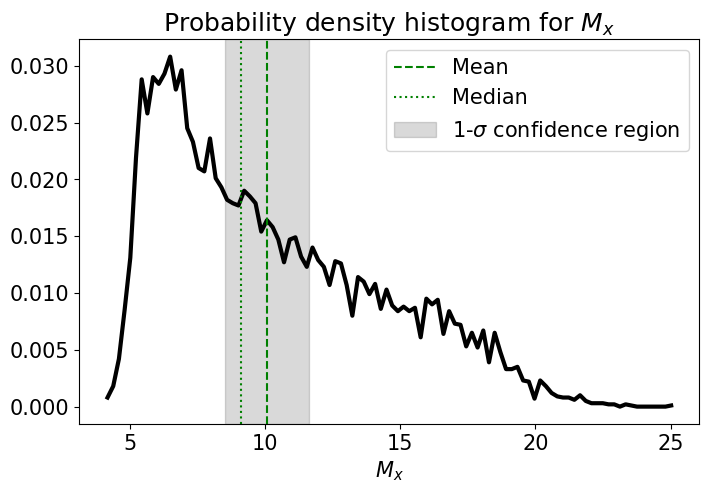

In [119]:
fig, ax = plt.subplots(figsize=[8,5])

plt.plot(bins_count[1:], PDF, color='k', linewidth=3)
plt.axvline(Mxmean, label='Mean', color='green', ls='dashed')
plt.axvline(np.median(Mxdist), label='Median', color='green', ls='dotted')
ax.axvspan(Mxmean-Mxstd, Mxmean+Mxstd, color='k', alpha=.15, label='1-$\sigma$ confidence region')

plt.title('Probability density histogram for $M_x$')
plt.xlabel('$M_x$')
plt.legend()
plt.show()

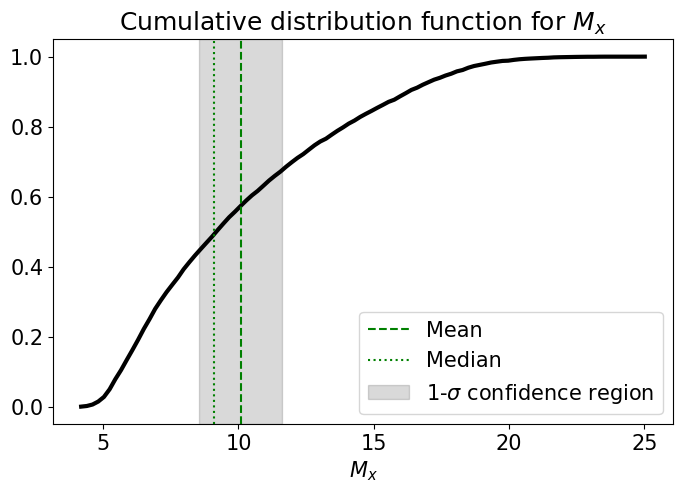

In [120]:
fig, ax = plt.subplots(figsize=[8,5])

plt.plot(bins_count[1:], CDF, color='k', linewidth=3)
plt.axvline(Mxmean, label='Mean', color='green', ls='dashed')
plt.axvline(np.median(Mxdist), label='Median', color='green', ls='dotted')
ax.axvspan(Mxmean-Mxstd, Mxmean+Mxstd, color='k', alpha=.15, label='1-$\sigma$ confidence region')

plt.title('Cumulative distribution function for $M_x$')
plt.xlabel('$M_x$')
plt.legend()
plt.show()

12: Give the probability that the compact object mass is higher
than 3 solar masses, and hence the probability that it
is a black hole rather than a neutron star. [5]

The mean of the distribution is 10.11 M$_\odot$, and the standard deviation is 1.54 M$_\odot$. To get below 3 M$_\odot$, we'd need to go down 5 standard deviations from the mean value of the distribution (the mean minus 5-$\sigma$ is 2.37 M$_\odot$, and minus 4-$\sigma$ is 3.92 M$_\odot$). This means that there is near a 100% probability that the compact object mass is higher than 3 M$_\odot$, and thus it is a black hole.